# Regridding using ESMF with xESMF and ESMPy wrappers

In [ ]:
# download our WOA data
!wget https://data.nodc.noaa.gov/woa/WOA13/DATA/temperature/netcdf/5564/1.00/woa13_5564_t00_01.nc

In [1]:
woadir = './'

--2018-07-09 13:04:56--  https://data.nodc.noaa.gov/woa/WOA13/DATA/temperature/netcdf/5564/1.00/woa13_5564_t00_01.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 140.90.235.40
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|140.90.235.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185103203 (177M) [application/x-netcdf]
Saving to: ‘woa13_5564_t00_01.nc.1’

woa13_5564_t00_01.n 100%[===================>] 176.53M  6.66MB/s    in 27s     

2018-07-09 13:05:23 (6.62 MB/s) - ‘woa13_5564_t00_01.nc.1’ saved [185103203/185103203]



In [2]:
import xarray as xr
import matplotlib.pylab as plt
from matplotlib import cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/5.1.0/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
woa = xr.open_dataset(woadir + 'woa13_5564_t00_01.nc',decode_times=False)

In [4]:
woa

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * lon                 (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * depth               (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 ...
  * time                (time) float32 6.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa            

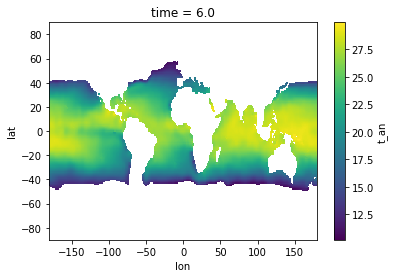

In [5]:
woa['t_an'].sel(depth=0).where(woa['t_an'].sel(depth=100) > 10).plot()

In [6]:
# download a ROMS irregular grid 
!wget http://oceanus.esm.rutgers.edu:8080/thredds/fileServer/ROMS/NWA/Inputs/NWA_grd.nc

--2018-07-09 13:05:45--  http://oceanus.esm.rutgers.edu:8080/thredds/fileServer/ROMS/NWA/Inputs/NWA_grd.nc
Resolving oceanus.esm.rutgers.edu (oceanus.esm.rutgers.edu)... 165.230.173.131
Connecting to oceanus.esm.rutgers.edu (oceanus.esm.rutgers.edu)|165.230.173.131|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71046252 (68M) [application/x-netcdf]
Saving to: ‘NWA_grd.nc.1’

NWA_grd.nc.1          4%[                    ]   3.37M   607KB/s    eta 90s    ^C


In [7]:
romsdir = './'

In [8]:
roms_nwa = xr.open_dataset(romsdir + 'NWA_grd.nc')

In [9]:
roms_nwa

<xarray.Dataset>
Dimensions:     (bath: 1, eta_psi: 361, eta_rho: 362, eta_u: 362, eta_v: 361, eta_vert: 363, s_rho: 40, s_w: 41, xi_psi: 721, xi_rho: 722, xi_u: 721, xi_v: 722, xi_vert: 723)
Coordinates:
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
  * s_w         (s_w) float64 -1.0 -0.975 -0.95 -0.925 -0.9 -0.875 -0.85 ...
Dimensions without coordinates: bath, eta_psi, eta_rho, eta_u, eta_v, eta_vert, xi_psi, xi_rho, xi_u, xi_v, xi_vert
Data variables:
    theta_s     float64 ...
    theta_b     float64 ...
    Tcline      float64 ...
    hc          float64 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float64 ...
    hraw        (bath, eta_rho, xi_rho) float64 ...
    f           (eta_rho, xi_rho) float64 ...
    pm          (eta_rho, xi_rho) float64 ...
    pn          (eta_rho, xi_rho) float64 ...
    dmde        (eta_rho, xi_rho) float64 ...
    dndx        (eta_rho, xi_rho) float64 ...


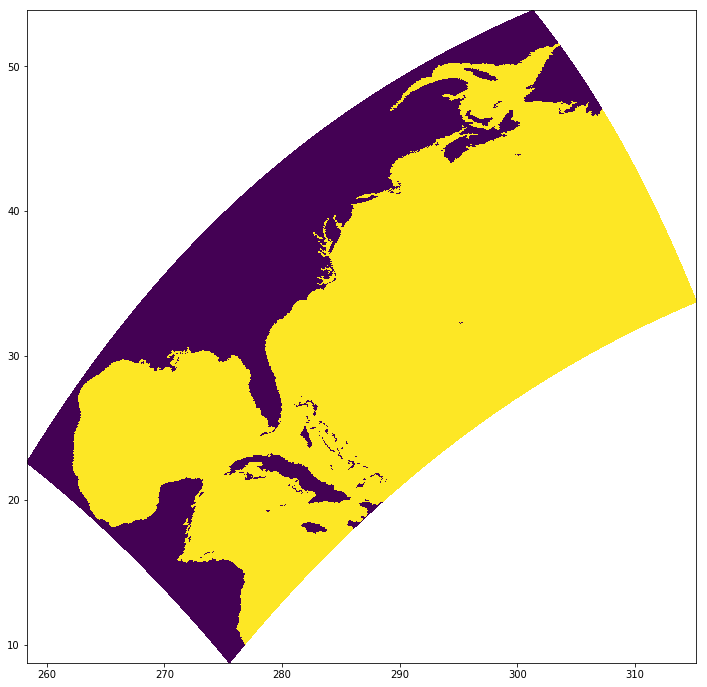

In [10]:
plt.figure(figsize=[12,12])
plt.pcolormesh(roms_nwa['lon_vert'].values,roms_nwa['lat_vert'].values,roms_nwa['mask_rho'].values)
plt.show()

## The easy way 

In [11]:
# using xESMF package, see http://xesmf.readthedocs.io/en/latest/installation.html for install
import xesmf as xe

In [12]:
# xESMF wants longitude and latitude names to be strictly lon, lat
# so we rename
roms_nwa.rename({'lon_rho':'lon','lat_rho':'lat'},inplace=True)

<xarray.Dataset>
Dimensions:     (bath: 1, eta_psi: 361, eta_rho: 362, eta_u: 362, eta_v: 361, eta_vert: 363, s_rho: 40, s_w: 41, xi_psi: 721, xi_rho: 722, xi_u: 721, xi_v: 722, xi_vert: 723)
Coordinates:
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
  * s_w         (s_w) float64 -1.0 -0.975 -0.95 -0.925 -0.9 -0.875 -0.85 ...
Dimensions without coordinates: bath, eta_psi, eta_rho, eta_u, eta_v, eta_vert, xi_psi, xi_rho, xi_u, xi_v, xi_vert
Data variables:
    theta_s     float64 ...
    theta_b     float64 ...
    Tcline      float64 ...
    hc          float64 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float64 ...
    hraw        (bath, eta_rho, xi_rho) float64 ...
    f           (eta_rho, xi_rho) float64 ...
    pm          (eta_rho, xi_rho) float64 ...
    pn          (eta_rho, xi_rho) float64 ...
    dmde        (eta_rho, xi_rho) float64 ...
    dndx        (eta_rho, xi_rho) float64 ...


In [13]:
# create a regridding method from WOA to NWA using high order patch interpolation
regrid_patch = xe.Regridder(woa,roms_nwa,method='patch',periodic=True)
# other method are possible : bilinear, nearest neighbor,...
# conservative : add lon_b, lat_b (for bounds = corners, size (n+1,m+1))

Overwrite existing file: patch_180x360_362x722_peri.nc 
 You can set reuse_weights=True to save computing time.


In [14]:
# interpolate temperature
temp_out = regrid_patch(woa['t_an'])

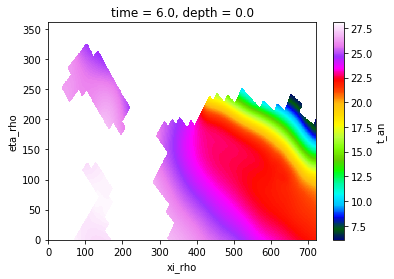

In [15]:
# look at results
temp_out.sel(depth=0).plot(cmap=cm.gist_ncar)

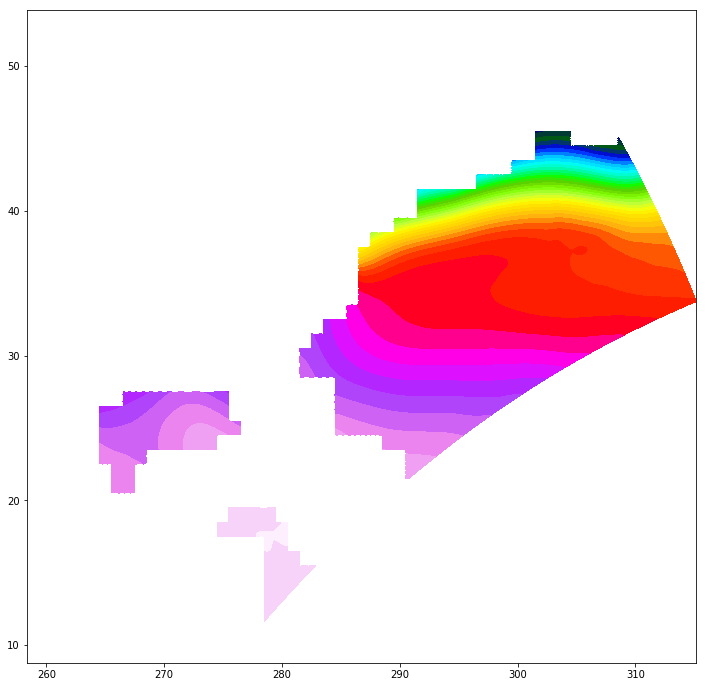

In [16]:
# let's do a (slightly) nicer plot
plt.figure(figsize=[12,12])
plt.contourf(roms_nwa['lon'].values,roms_nwa['lat'].values,temp_out.sel(depth=0).values.squeeze(),50,cmap=cm.gist_ncar)
plt.show()

In [17]:
# conservative interpolation : we need to create the corners of the cells
lon = woa['lon']
lat = woa['lat']

# compute the extended array at cell center
nx = lon.shape[0] ; ny = lat.shape[0]

lon_extended = np.zeros((nx+2))
lon_extended[1:-1] = lon.copy()
lon_extended[0] = lon[0] - (lon[1]-lon[0])
lon_extended[-1] = lon[-1] + (lon[-1]-lon[-2])

lat_extended = np.zeros((ny+2))
lat_extended[1:-1] = lat.copy()
lat_extended[0] = max(-90. , lat[0] - (lat[1]-lat[0]))
lat_extended[-1] = min(90. , lat[-1] + (lat[-1]-lat[-2]))

# compute the cell corner values
lon_corner = 0.5 * (lon_extended[:-1] + lon_extended[1:])
lat_corner = 0.5 * (lat_extended[:-1] + lat_extended[1:])

# make them 2d arrays
lon_centers, lat_centers = np.meshgrid(lon,lat)
lon_corners, lat_corners = np.meshgrid(lon_corner,lat_corner)

woa['lon_b'] = xr.DataArray(lon_corners,dims=('lonp1','latp1'))
woa['lat_b'] = xr.DataArray(lat_corners,dims=('lonp1','latp1'))

In [18]:
# similarly xESMF wants corners to be named strictly
roms_nwa.rename({'lon_vert':'lon_b','lat_vert':'lat_b'},inplace=True)

<xarray.Dataset>
Dimensions:     (bath: 1, eta_psi: 361, eta_rho: 362, eta_u: 362, eta_v: 361, eta_vert: 363, s_rho: 40, s_w: 41, xi_psi: 721, xi_rho: 722, xi_u: 721, xi_v: 722, xi_vert: 723)
Coordinates:
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
  * s_w         (s_w) float64 -1.0 -0.975 -0.95 -0.925 -0.9 -0.875 -0.85 ...
Dimensions without coordinates: bath, eta_psi, eta_rho, eta_u, eta_v, eta_vert, xi_psi, xi_rho, xi_u, xi_v, xi_vert
Data variables:
    theta_s     float64 ...
    theta_b     float64 ...
    Tcline      float64 ...
    hc          float64 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float64 ...
    hraw        (bath, eta_rho, xi_rho) float64 ...
    f           (eta_rho, xi_rho) float64 ...
    pm          (eta_rho, xi_rho) float64 ...
    pn          (eta_rho, xi_rho) float64 ...
    dmde        (eta_rho, xi_rho) float64 ...
    dndx        (eta_rho, xi_rho) float64 ...


In [19]:
# create conservative regridding method
regrid_conserve = xe.Regridder(woa,roms_nwa,method='conservative',periodic=True)

Overwrite existing file: conservative_180x360_362x722.nc 
 You can set reuse_weights=True to save computing time.


In [20]:
# and apply to temperature
temp_out_conserve = regrid_conserve(woa['t_an'])

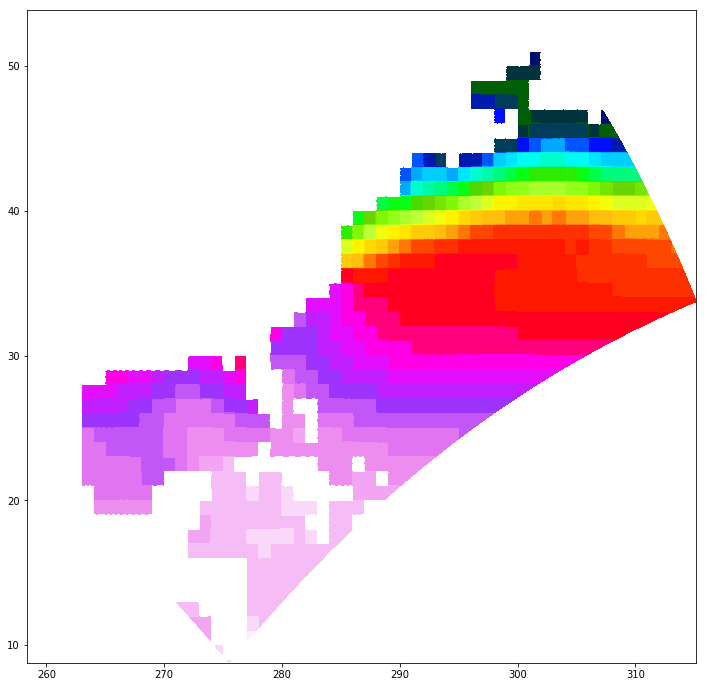

In [21]:
plt.figure(figsize=[12,12])
plt.contourf(roms_nwa['lon'].values,roms_nwa['lat'].values,temp_out_conserve.sel(depth=0).values.squeeze(),
             50,cmap=cm.gist_ncar)
plt.show()

## The not so easy way 

In [ ]:
import ESMF

### Let's create a raw bathymetry

In [ ]:
roms_nwa = xr.open_dataset(romsdir + 'NWA_grd.nc')

#### ROMS ESMF grid

In [ ]:
# create an ESMF target grid corresponding to our ROMS grid

ny_target, nx_target = roms_nwa.lon_rho.shape
esmf_grid_target = ESMF.Grid(np.array([nx_target,ny_target]))
# cell center
esmf_grid_target.add_coords(staggerloc=[ESMF.StaggerLoc.CENTER])
esmf_grid_target.coords[ESMF.StaggerLoc.CENTER]
esmf_grid_target.coords[ESMF.StaggerLoc.CENTER][0][:]=roms_nwa.lon_rho.transpose()
esmf_grid_target.coords[ESMF.StaggerLoc.CENTER][1][:]=roms_nwa.lat_rho.transpose()
# cell corner
esmf_grid_target.add_coords(staggerloc=[ESMF.StaggerLoc.CORNER_VCENTER])
esmf_grid_target.coords[ESMF.StaggerLoc.CORNER_VCENTER]
esmf_grid_target.coords[ESMF.StaggerLoc.CORNER_VCENTER][0][:]=roms_nwa.lon_vert.transpose()
esmf_grid_target.coords[ESMF.StaggerLoc.CORNER_VCENTER][1][:]=roms_nwa.lat_vert.transpose()
# VERY IMPORTANT! if not set properly, this ruins the interpolation process
# our domain is regional/not global, hence we must set:
esmf_grid_target.is_sphere=False

#### Etopo ESMF grid

In [ ]:
# Bathy is taken from ETOPO1 website, select area and export to netcdf
# my extraction is on byrd : ~rdussin/demo_files

if byrd:
    topodir = '~rdussin/demo_files/'
else:
    topodir = './'

In [ ]:
# if we were using bilinear interpolation, we could use the ESMF built-in function to
# read bathy file into grid object
# esmf_grid_source = ESMF.Grid(filename='etopo1_bedrock.nc',filetype=ESMF.FileFormat.GRIDSPEC,is_sphere=False)

# However it doesn't include the corners so we can either add the lon_bounds and lat_bounds array to the
# file and add add_corner_stagger=True to the previous command or we can just read lon/lat from the file
# and add the corners manually

# read coords from netcdf file
etopo = xr.open_dataset(topodir + 'etopo1_bedrock.nc')
lon = etopo['lon'].values[::10]
lat = etopo['lat'].values[::10]

## VERY IMPORTANT !! I subsample for the sake of computational speed for demo purposes
## don't do this in real like, that defeats the whole purpose

# compute the extended array at cell center
nx = lon.shape[0] ; ny = lat.shape[0]

lon_extended = np.zeros((nx+2))
lon_extended[1:-1] = lon.copy()
lon_extended[0] = lon[0] - (lon[1]-lon[0])
lon_extended[-1] = lon[-1] + (lon[-1]-lon[-2])

lat_extended = np.zeros((ny+2))
lat_extended[1:-1] = lat.copy()
lat_extended[0] = max(-90. , lat[0] - (lat[1]-lat[0]))
lat_extended[-1] = min(90. , lat[-1] + (lat[-1]-lat[-2]))

# compute the cell corner values
lon_corner = 0.5 * (lon_extended[:-1] + lon_extended[1:])
lat_corner = 0.5 * (lat_extended[:-1] + lat_extended[1:])

# make them 2d arrays
lon_centers, lat_centers = np.meshgrid(lon,lat)
lon_corners, lat_corners = np.meshgrid(lon_corner,lat_corner)

# create an ESMF grid for the input bathy and add lon/lat for cells
esmf_grid_source = ESMF.Grid(np.array([nx,ny]))
# cell center
esmf_grid_source.add_coords(staggerloc=[ESMF.StaggerLoc.CENTER])
esmf_grid_source.coords[ESMF.StaggerLoc.CENTER]
esmf_grid_source.coords[ESMF.StaggerLoc.CENTER][0][:]=lon_centers.T
esmf_grid_source.coords[ESMF.StaggerLoc.CENTER][1][:]=lat_centers.T
#cell corners
esmf_grid_source.add_coords(staggerloc=[ESMF.StaggerLoc.CORNER_VCENTER])
esmf_grid_source.coords[ESMF.StaggerLoc.CORNER_VCENTER]
esmf_grid_source.coords[ESMF.StaggerLoc.CORNER_VCENTER][0][:]=lon_corners.T
esmf_grid_source.coords[ESMF.StaggerLoc.CORNER_VCENTER][1][:]=lat_corners.T
# our input bathy data is a regional extraction, hence we must set:
esmf_grid_source.is_sphere=False

#### run the regridding

we are running a conservative regridding so conserve water depth. This step is gonna take a few minutes so it's a good time to go get a coffee 

In [ ]:
# Create a source field object for bathy located at the center of the grid cells
esmf_field_source = ESMF.Field(esmf_grid_source, staggerloc=ESMF.StaggerLoc.CENTER)

# and feed it to the field object
esmf_field_source.data[:] = etopo.Band1.values[::10,::10].transpose() # CAREFUL : SUBSAMPLING FOR DEMO

# Create a destination field object on the ROMS grid
esmf_field_target = ESMF.Field(esmf_grid_target, staggerloc=ESMF.StaggerLoc.CENTER)

# Set up a regridding method between source and destination
regridding = ESMF.Regrid(esmf_field_source, esmf_field_target,
                         regrid_method=ESMF.RegridMethod.CONSERVE)

esmf_field_target = regridding(esmf_field_source, esmf_field_target)

In [ ]:
# Check out our freshly interpolated bathymetry
topo = esmf_field_target.data[:].transpose()

plt.figure(figsize=[12,12])
plt.pcolormesh(roms_nwa.lon_rho,roms_nwa.lat_rho,topo,cmap=cm.jet); plt.colorbar() ; plt.clim([-5000.,1000])
plt.show()